In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
BostonTrain=pd.read_csv('Boston.csv')

In [45]:
BostonTrain.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
BostonTrain.info()
BostonTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


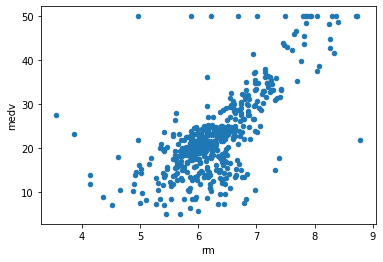

In [48]:
BostonTrain.plot.scatter('rm', 'medv')

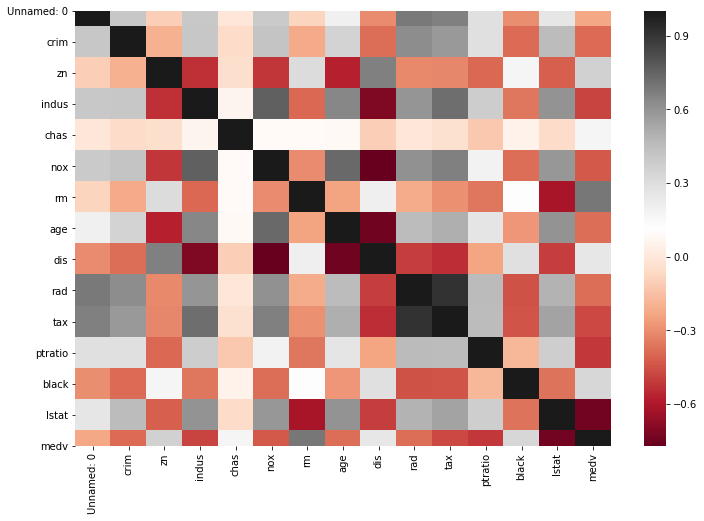

In [49]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap = 'RdGy')

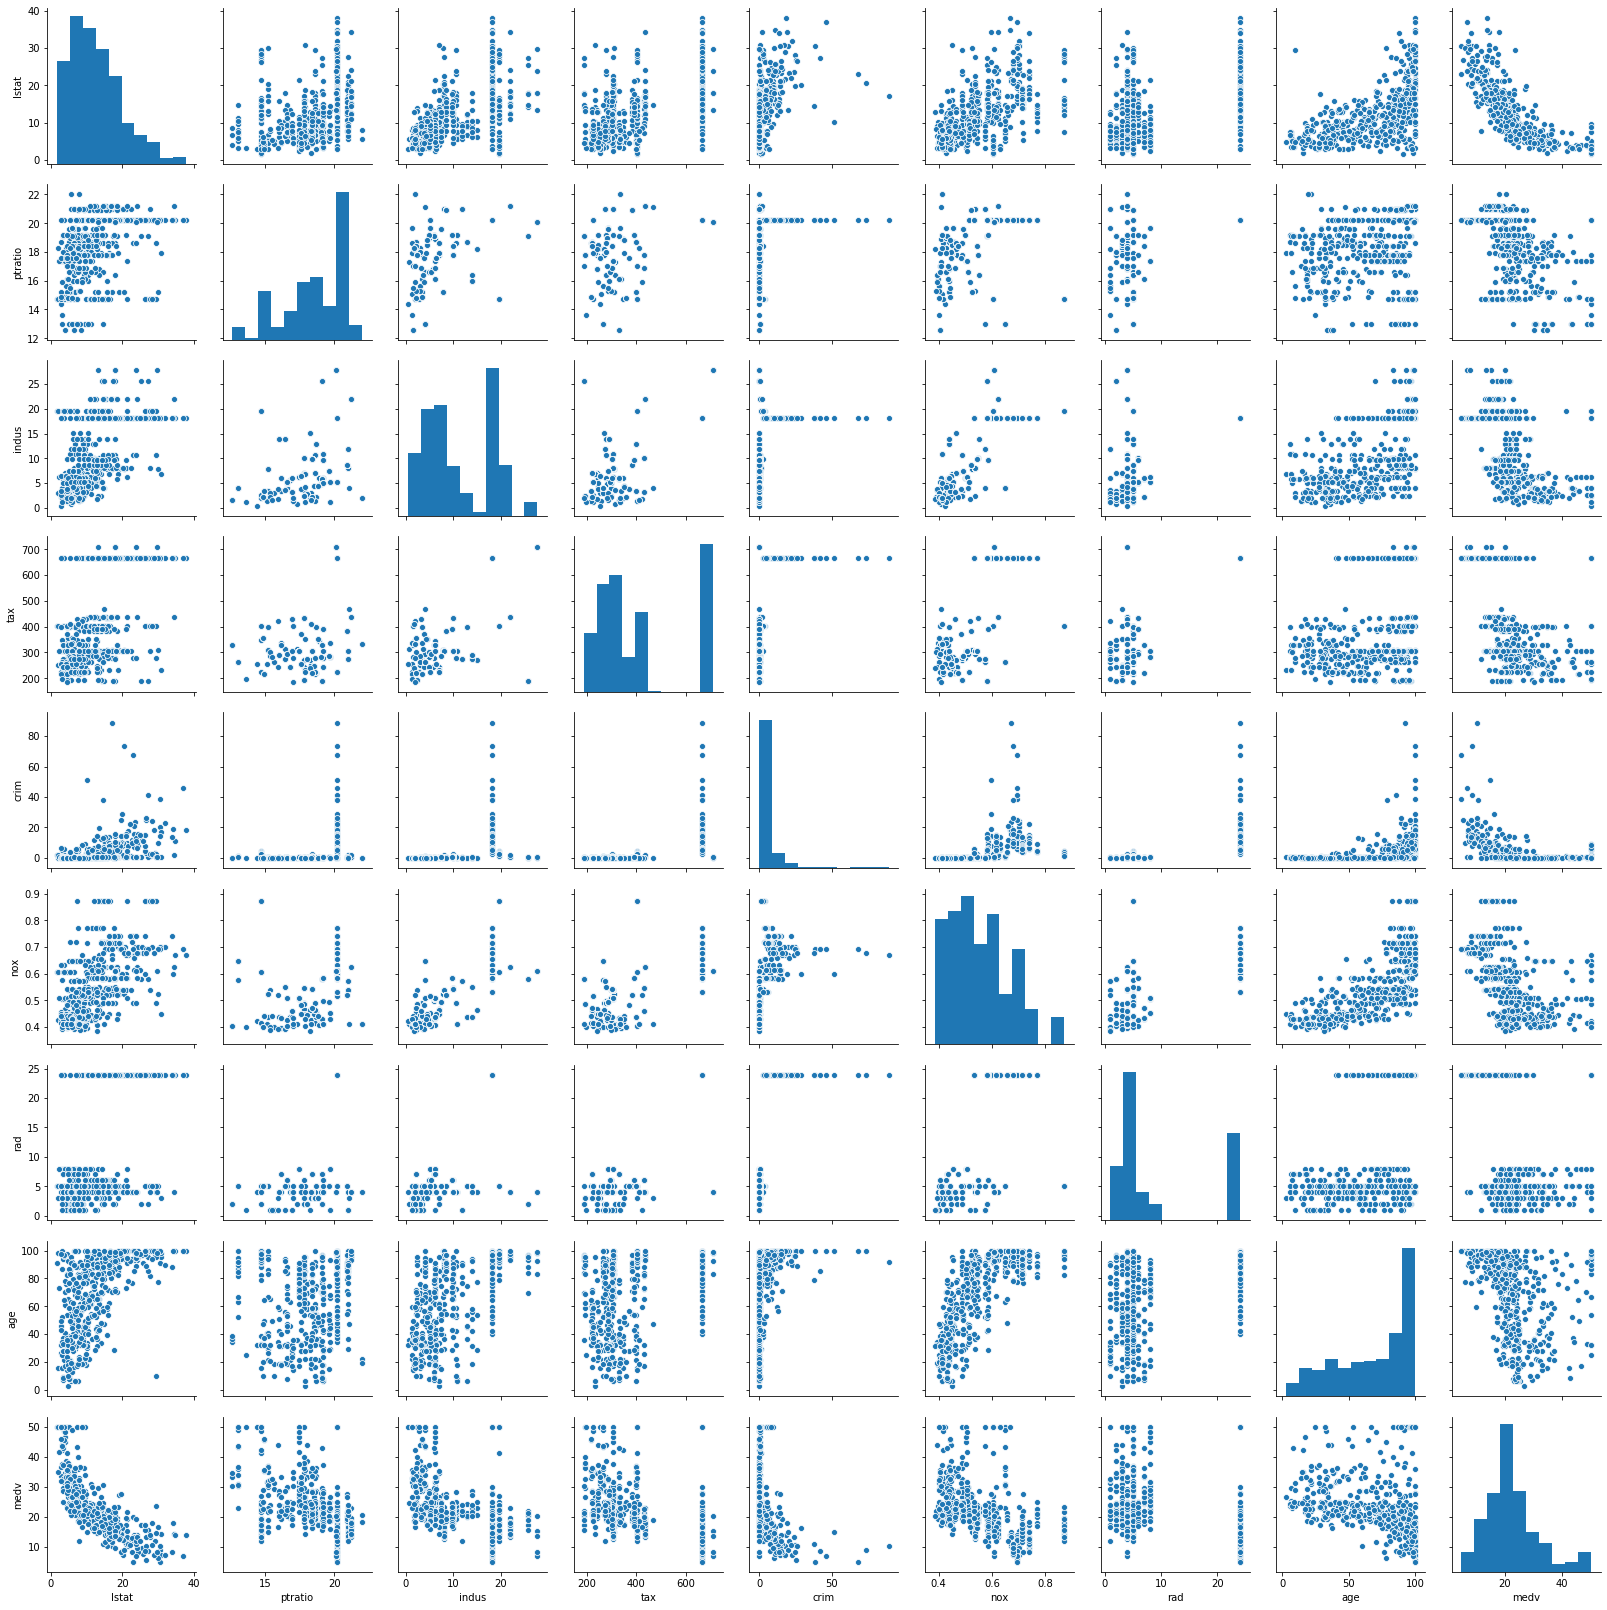

In [50]:
sns.pairplot(BostonTrain, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

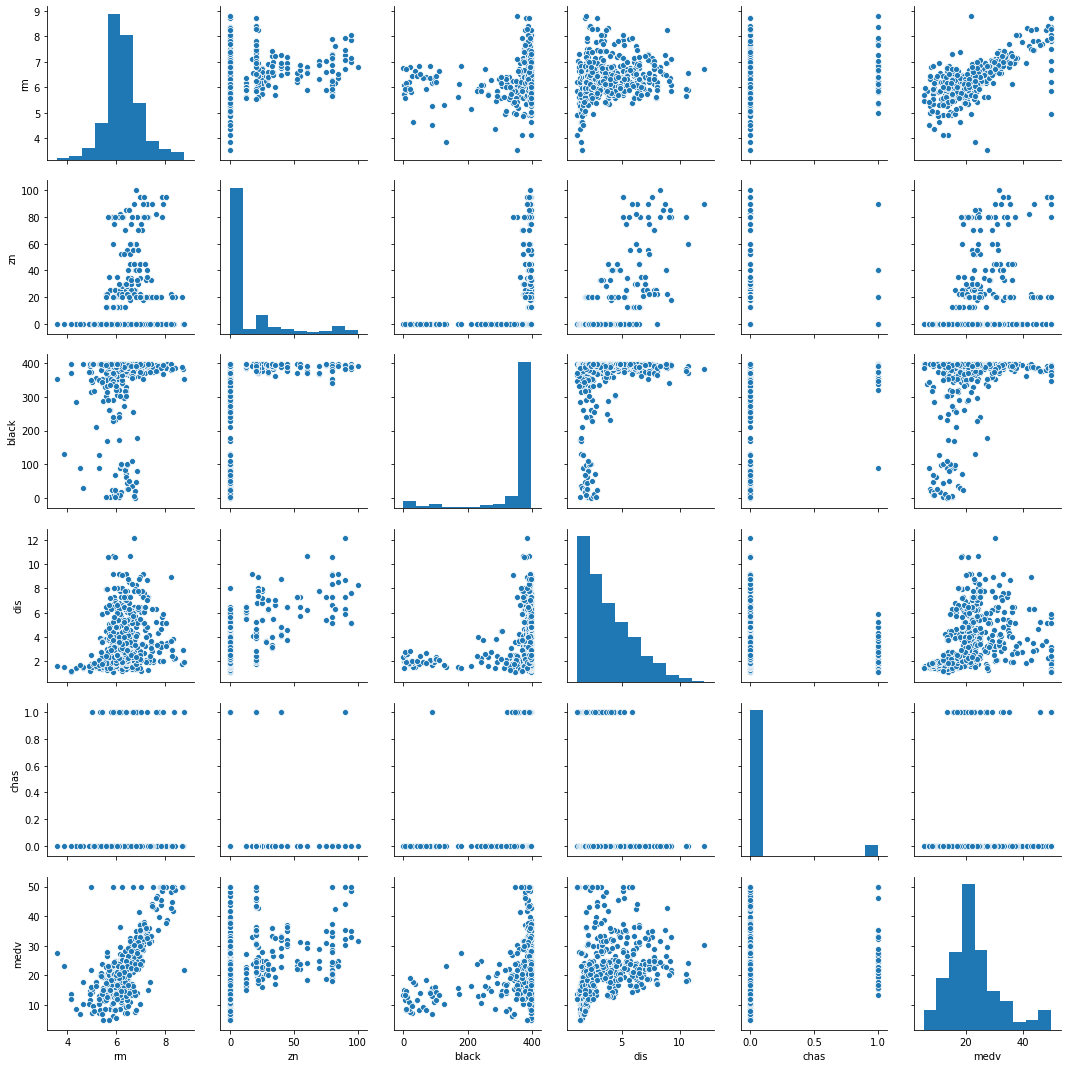

In [51]:
sns.pairplot(BostonTrain, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])


In [53]:
X = BostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = BostonTrain['medv']

In [58]:
rom sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [60]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

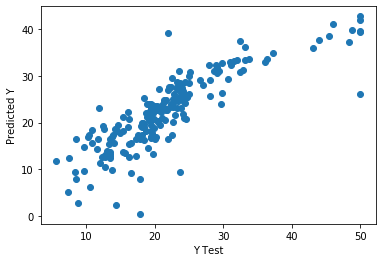

In [62]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.405376479719691
MSE: 22.1666187739161
RMSE: 4.708143877784121


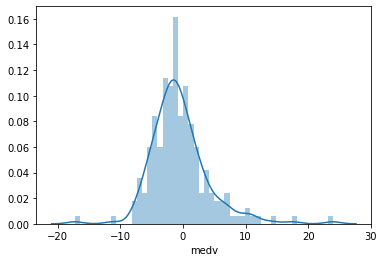

In [64]:
sns.distplot((y_test-predictions),bins=50);

In [66]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.072201
zn,0.041734
indus,0.062268
chas,3.428827
nox,-17.348065
rm,3.510665
age,-0.004460
dis,-1.351096
rad,0.297922
tax,-0.010801
